# Основные компонеты matplotlib
MPL очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов:
- *Figure* - этой контейгер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров *Axes*.
- *Axes* - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопроваждается с вызовом *subplot*, который и помещает *Axes* на регулярную сетку. Поэтому, так же часто *Axes* и *Subplot* можно считать синонимами. Но с тем что это за сетка и как это размещение работает, разберемся ниже.

Каждая облсть *Axes* содержит *XAxis* и *YAxis*. Они содержат деления, метки и прочие вспомогательные атрибуты. В этом уроке мы будем контролировать тики, метки и пределы данных через другие механизмы, поэтому подробно рассматривать оси мы не будем.

## Начало работы

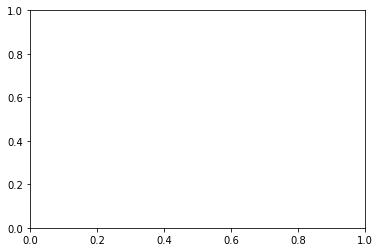

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

В строке `fig = plt.figure()` мы создали экземпляр класса *Figure*. В строке `ax = fig.add_subplot(111)` мы добавили в *Figure* область *Axes*. Вообще, было бы правильнее использовать `fig.add_axes`, но в данном случае `fig.add_subplots(111)` намного удобнее, в конце концов `sublot` просто размещает *Axes* на сетке *Figure*. Обратите внимание на параметр, который мы передаем *111* - это первая строка, первый столбец и первая (единственная) ячейка на сетке *Figure*.

В том что Figure и Axes это разные области можно легко убедиться если изменить их цвет:

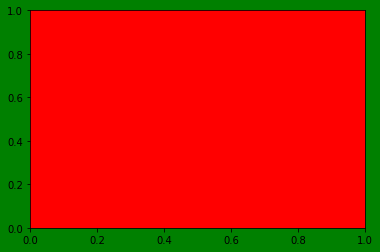

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor= 'green')
ax.set(facecolor='red')

plt.show()

*Axes* должна принадлежать только одной области *Figure*. Как правило, всегда сначала создается область *Figure*, а затем с помощью *add_subplot()* в *Figure* размещается одна или несколько областей *Axes*.

А теперь обратите внимание на то, как с помощью метода `set()` мы изменили цвет *Figure* и *Axes*. По сути, это самый быстрый способ устанавливать параметры, но он не самый явный. Давайте установим параметры явно. 

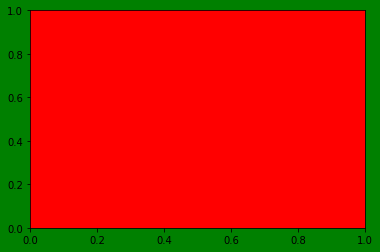

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_facecolor('green')
ax.set_facecolor('red')

plt.show()

Именно *Axes* вам придется видоизменять чаще всего, поэтому давайте установим побольше параметров для данной области:

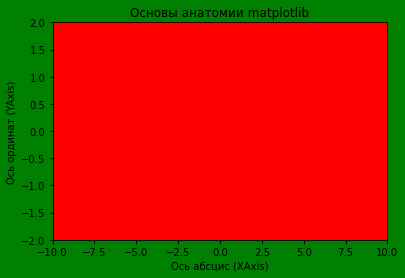

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_facecolor('green')

ax.set_facecolor('red')
ax.set_xlim([-10, 10])
ax.set_ylim([-2,2])
ax.set_title('Основы анатомии matplotlib')
ax.set_xlabel('Ось абсцис (XAxis)')
ax.set_ylabel('Ось ординат (YAxis)')

plt.show()

Хотя мы могли бы выполнить это более коротким способом:

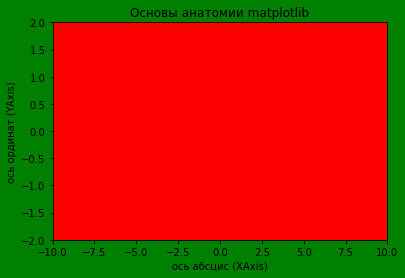

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor='green')
ax.set(facecolor='red',
    xlim = [-10, 10],
    ylim = [-2,2],
    title = 'Основы анатомии matplotlib',
    xlabel = 'ось абсцис (XAxis)',
    ylabel = 'ось ординат (YAxis)')

plt.show()

Данный способ хорош если вы обладаете некоторым опытом и помните имена всех параметров. Новичкам я все-таки рекомендую явный способ установки параметров: так и быстрее (благодаря автодополнению) и очевиднее.

Метод `set` есть практически у всех объектов MLP. Например, нам вдруг захотелось изменить цвет и размер `title`. Для этого существует также два способа:

In [9]:
ax.set_title('Основы анатомии matplotlib', color = 'white', size = 20)

Text(0.5, 1.0, 'Основы анатомии matplotlib')

In [10]:
ax.set_title('Основы анатомии matplotlib')
ax.title.set_color('white')
ax.title.set_size(20)

В таких случаях первый способ, снова, кажется более простым. Но все же второй способ позволяет создавать код который легко понять и в котором легко ориентироваться, а это тоже очень дорогого стоит.

## Отображение данных на графике
Большинство графиков: линий, гистограмм, круговых диаграмм т.е. отображение данных происхожит на *Axes*. Поэтому, для рисования на *Axes* необходимо использовать какой-нибудь из его методов. К слову сказать, этих методов целая куча, но мы сосредоточимся всего на двух: `plot` и `scatter`.
- `plot` рисует точки соединенные линиями;
- `scatter` просто рисует точки

Построим график на котормо будет присутствовать отображение одних данных точками, а других линиями:

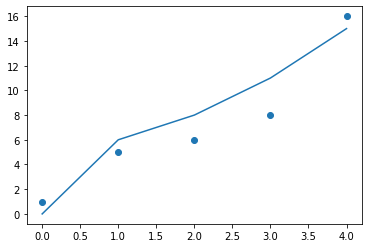

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0,1,2,3,4],[0,6,8,11,15])
ax.scatter([0,1,2,3,4],[1,5,6,8,16])

plt.show()

Нарисованные данные также поддерживают самые разные параметры внешнего вида:

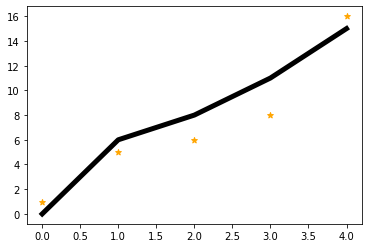

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0,1,2,3,4],[0,6,8,11,15], color = 'black', linewidth = 5)
ax.scatter([0,1,2,3,4],[1,5,6,8,16], color = 'orange', marker = '*')

plt.show()

Параметры внешнего вида придется указывать (если надо) вместе с данными внутри `ax.plot()` и `ax.scatter()`. Это противоречит моим рекомендациям, но и в этом случае можно оформить код в более читаемый вид: